In [25]:
import pandas as pd
import json
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Series
from scipy import stats
from plotly import graph_objs as go
# from folium.plugins import HeatMap

# import geoplotlib
# from geoplotlib.utils import read_csv 

# rt folium
# from folium import plugins

# %matplotlib inlineimpo

In [13]:
crime_file = "Robbery_2014_to_2018.csv"
crime_df = pd.read_csv(crime_file)
rob_df = crime_df.sort_values(["occurrenceyear"], ascending=False)
rob_df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
18127,-79.398048,43.652947,145218,GO-2018854523,2018-05-12T02:30:00.000Z,2018-05-12T02:42:00.000Z,Outside,1610,200,Robbery - Mugging,...,132.0,Saturday,2,Robbery,D52,78,Kensington-Chinatown (78),43.652947,-79.398048,17000
7860,-79.293526,43.671402,80764,GO-2018826811,2018-05-08T00:01:00.000Z,2018-05-08T05:32:00.000Z,Outside,1610,200,Robbery - Mugging,...,128.0,Tuesday,0,Robbery,D55,63,The Beaches (63),43.671402,-79.293526,9861
11682,-79.513802,43.719833,140523,GO-201871748,2018-01-11T00:45:00.000Z,2018-01-12T12:28:00.000Z,Outside,1610,200,Robbery - Mugging,...,11.0,Thursday,0,Robbery,D31,26,Downsview-Roding-CFB (26),43.719833,-79.513802,15683
5278,-79.229057,43.756023,87286,GO-20181911245,2018-10-16T12:30:00.000Z,2018-10-16T14:25:00.000Z,Outside,1610,200,Robbery - Mugging,...,289.0,Tuesday,12,Robbery,D43,137,Woburn (137),43.756023,-79.229057,10279
5277,-79.404518,43.666527,87285,GO-20181911093,2018-10-16T13:15:00.000Z,2018-10-16T15:00:00.000Z,Commercial,1610,210,Robbery - Business,...,289.0,Tuesday,13,Robbery,D14,95,Annex (95),43.666527,-79.404518,10278


In [15]:
len(rob_df)

18128

In [18]:
rob_df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId'],
      dtype='object')

In [38]:
import pandas as pd

df = pd.read_csv('Robbery_2014_to_2018.csv')
df.dropna()



,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.374847,43.660656,8440,GO-2015942657,2015-06-05T14:15:00.000Z,2015-06-05T15:41:00.000Z,Outside,1610,220,Robbery - Other,...,156.0,Friday,14,Robbery,D51,73,Moss Park (73),43.660656,-79.374847,1001
1,-79.222259,43.751030,8441,GO-2015942418,2015-06-02T15:00:00.000Z,2015-06-05T15:09:00.000Z,Other,1610,200,Robbery - Mugging,...,153.0,Tuesday,15,Robbery,D43,137,Woburn (137),43.751030,-79.222259,1002
2,-79.420914,43.663029,8445,GO-20151975524,2015-11-17T21:05:00.000Z,2015-11-17T22:18:00.000Z,Outside,1610,200,Robbery - Mugging,...,321.0,Tuesday,21,Robbery,D14,93,Dovercourt-Wallace Emerson-Junction (93),43.663029,-79.420914,1003
3,-79.381638,43.667374,8447,GO-20151976833,2015-11-18T05:23:00.000Z,2015-11-18T05:23:00.000Z,Commercial,1610,210,Robbery - Business,...,322.0,Wednesday,5,Robbery,D51,75,Church-Yonge Corridor (75),43.667374,-79.381638,1004
4,-79.313820,43.675320,8453,GO-20152102376,2015-12-08T12:10:00.000Z,2015-12-08T12:19:00.000Z,Outside,1610,220,Robbery - Other,...,342.0,Tuesday,12,Robbery,D55,64,Woodbine Corridor (64),43.675320,-79.313820,1005
5,-79.313820,43.675320,8454,GO-20152102376,2015-12-08T12:10:00.000Z,2015-12-08T12:19:00.000Z,Outside,1610,220,Robbery - Other,...,342.0,Tuesday,12,Robbery,D55,64,Woodbine Corridor (64),43.675320,-79.313820,1006
6,-79.313820,43.675320,8455,GO-20152102376,2015-12-08T12:10:00.000Z,2015-12-08T12:19:00.000Z,Outside,1610,220,Robbery - Other,...,342.0,Tuesday,12,Robbery,D55,64,Woodbine Corridor (64),43.675320,-79.313820,1007
7,-79.383110,43.661373,8458,GO-20152152428,2015-12-16T00:00:00.000Z,2015-12-16T04:57:00.000Z,Commercial,1610,200,Robbery - Mugging,...,350.0,Wednesday,0,Robbery,D52,75,Church-Yonge Corridor (75),43.661373,-79.383110,1008
8,-79.507225,43.715458,8460,GO-20152157652,2015-12-16T20:40:00.000Z,2015-12-16T23:52:00.000Z,Outside,1610,200,Robbery - Mugging,...,350.0,Wednesday,20,Robbery,D12,28,Rustic (28),43.715458,-79.507225,1009
9,-79.476700,43.655926,8481,GO-2015837591,2015-05-20T00:25:00.000Z,2015-05-20T00:27:00.000Z,Outside,1610,200,Robbery - Mugging,...,140.0,Wednesday,0,Robbery,D11,88,High Park North (88),43.655926,-79.476700,1010


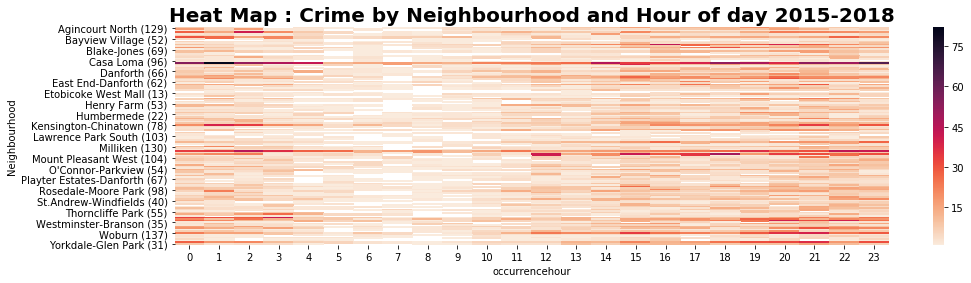

In [39]:
df_gb = pd.DataFrame(df.groupby(['Neighbourhood', 'occurrencehour']).size())
df_gb.reset_index(inplace=True)
df_gb.rename(columns={0:"Crimes"}, inplace=True)
df_h = df_gb.pivot("Neighbourhood", "occurrencehour", "Crimes")
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax = sns.heatmap(df_h, ax=ax, cmap= sns.cm.rocket_r )
plt.title('Heat Map : Crime by Neighbourhood and Hour of day 2015-2018', fontsize=20, weight='bold')
plt.savefig ("heatmap_time_2016.png")
plt.show()